In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [39]:
customers = pd.read_csv("Ecommerce Customers")

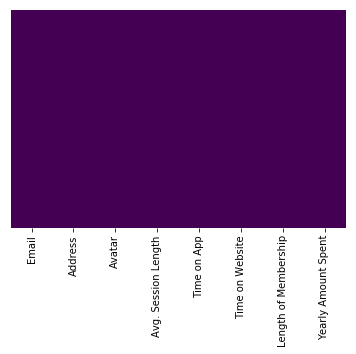

In [40]:
sns.heatmap(customers.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
#no multicolinearity
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [42]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [43]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [44]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


Exploratory Data Analysis

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


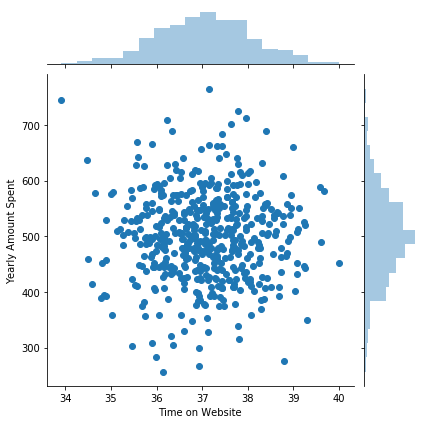

In [45]:
# not so correlated
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


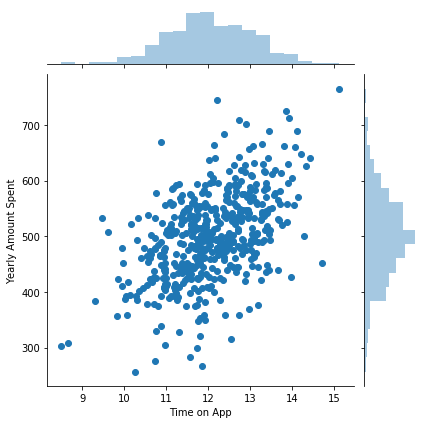

In [46]:
# More time on app, more money spent.
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


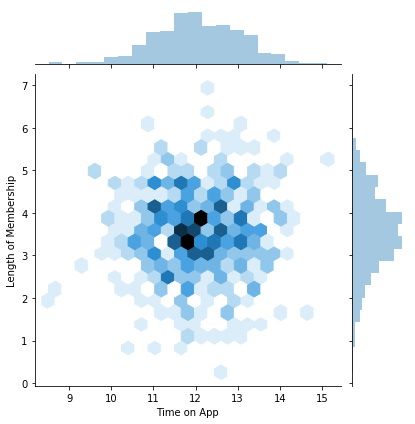

In [47]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


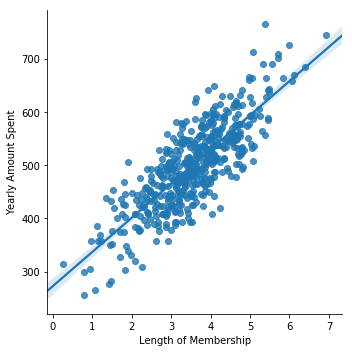

In [48]:
#good fit,very little error
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [49]:
y = customers['Yearly Amount Spent']

In [50]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.79467006 38.6818916   0.95548649 62.20199915]


In [57]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.794670
Time on App,38.681892
Time on Website,0.955486
Length of Membership,62.201999


In [58]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

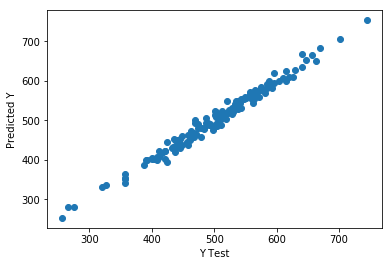

In [59]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=lm,X=X_train,y=y_train,cv=10)

In [24]:
accuracies.mean()

0.9781024800154375

In [25]:
accuracies.std()

0.007169275472607965

In [26]:
from sklearn.metrics import r2_score


#The best score is 1
print("Variance score: {}".format(r2_score(y_test, predictions)))

Variance score: 0.9890046246741233


In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [28]:
import statsmodels.api as sm

# Adding a constant column of 1's
x = sm.add_constant(X)


# Fit the model according to the ordinary Least Squares method
results = sm.OLS(endog = y, exog=x).fit()


# Summary of the model.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                         20:04:33   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Endogenity Test
error_residual=pd.DataFrame(y_test-predictions)
error_residual.reset_index(inplace = True)


Linearity_test_df = pd.DataFrame(X_test)
Linearity_test_df['Residual'] = error_residual['Yearly Amount Spent']
endogenity_check = Linearity_test_df.corr()

In [30]:
endogenity_check

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Residual
Avg. Session Length,1.000000,0.043715,-0.161450,0.137779,0.077767
Time on App,0.043715,1.000000,0.061789,0.026754,0.045748
Time on Website,-0.161450,0.061789,1.000000,-0.045302,0.269556
Length of Membership,0.137779,0.026754,-0.045302,1.000000,0.235613
Residual,0.077767,0.045748,0.269556,0.235613,1.000000


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


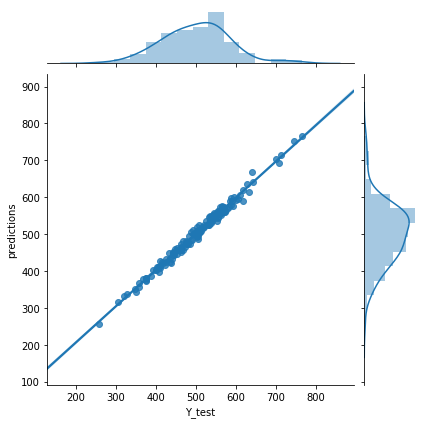

In [31]:
import scipy.stats as stats
residual_test = np.column_stack([y_test,predictions])
residual_test = pd.DataFrame(residual_test)
residual_test.columns='Y_test predictions'.split()
sns.jointplot(x='Y_test', y='predictions', data=residual_test, kind='reg')

In [32]:
# Performing the levene Test for Homoscedasticity
stats.levene(residual_test['Y_test'], residual_test['predictions'])

LeveneResult(statistic=0.012740349773641762, pvalue=0.9102071150874609)

In [33]:
# Performing the shapiro Test to check for Normality 
stats.shapiro(error_residual['Yearly Amount Spent'])

(0.9935503602027893, 0.7424219250679016)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


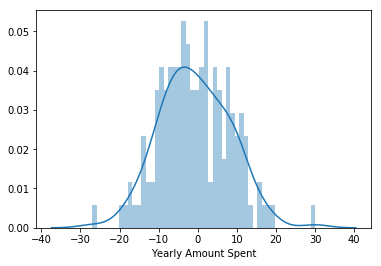

In [34]:
#Histogram of residuals
#normally distributed
sns.distplot((y_test-predictions),bins=50);